In [14]:
%plot --format svg

In [15]:
setdefaults

# Gauss Elimination
### Solving sets of equations with matrix operations

The number of dimensions of a matrix indicate the degrees of freedom of the system you are solving. 

If you have a set of known output, $y_{1},~y_{2},~...y_{N}$ and a set of equations that
relate unknown inputs, $x_{1},~x_{2},~...x_{N}$, then these can be written in a vector
matrix format as:

$y=Ax$

Consider a problem with 2 DOF:

$x_{1}+3x_{2}=1$

$2x_{1}+x_{2}=1$

$\left[ \begin{array}{cc}
1 & 3 \\
2 & 1 \end{array} \right]
\left[\begin{array}{c} 
x_{1} \\ 
x_{2} \end{array}\right]=
\left[\begin{array}{c} 
1 \\
1\end{array}\right]$

The solution for $x_{1}$ and $x_{2}$ is the intersection of two lines:

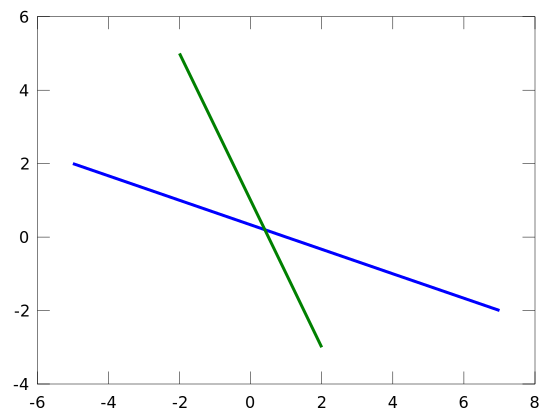

In [16]:
x21=[-2:2];
x11=1-3*x21;
x21=[-2:2];
x22=1-2*x21;
plot(x11,x21,x21,x22)

For a $3\times3$ matrix, the solution is the intersection of the 3 planes.

$10x_{1}+2x_{2}+x_{3}=1$

$2x_{1}+x_{2}+x_{3}=1$

$x_{1}+2x_{2}+10x_{3}=1$

$\left[ \begin{array}{cc}
10 & 2 & 1\\
2 & 1 & 1 \\
1 & 2 & 10\end{array} \right]
\left[\begin{array}{c} 
x_{1} \\ 
x_{2} \\
x_{3} \end{array}\right]=
\left[\begin{array}{c} 
1 \\
1 \\
1\end{array}\right]$

error: 'X22' undefined near line 1 column 16
error: 'X13' undefined near line 1 column 14
error: evaluating argument list element number 3


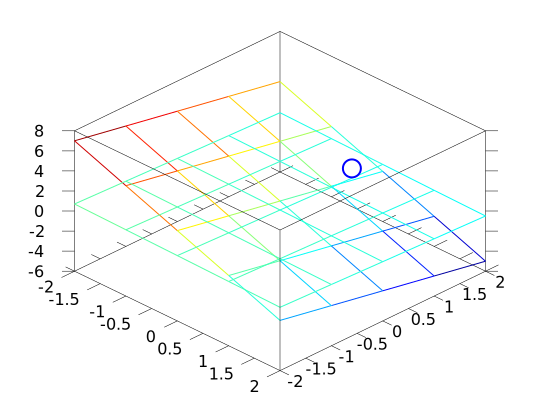

In [17]:
x11=linspace(-2,2,5);
x12=linspace(-2,2,5);
[X11,X12]=meshgrid(x11,x12);
X13=1-10*X11-2*X22;

x21=linspace(-2,2,5);
x22=linspace(-2,2,5);
[X21,X22]=meshgrid(x21,x22);
X23=1-2*X11-X22;

x31=linspace(-2,2,5);
x32=linspace(-2,2,5);
[X31,X32]=meshgrid(x31,x32);
X33=1/10*(1-X31-2*X32);

mesh(X11,X12,X13);
hold on;
mesh(X21,X22,X23)
mesh(X31,X32,X33)
x=[10,2, 1;2,1, 1; 1, 2, 10]\[1;1;1];
plot3(x(1),x(2),x(3),'o')
view(45,45)

After 3 DOF problems, the solutions are described as *hyperplane* intersections. Which are even harder to visualize

## Gauss elimination
### Solving sets of equations systematically

$\left[ \begin{array}{ccc|c}
   & A & & y \\
10 & 2 & 1 & 1\\
2 & 1 & 1  & 1 \\
1 & 2 & 10 & 1\end{array} 
\right] $

Ay(2,:)-Ay(1,:)/5 = ([2 1 1 1]-1/5[10 2 1 1])

$\left[ \begin{array}{ccc|c}
   & A & & y \\
10 & 2 & 1 & 1\\
0 & 3/5 & 4/5  & 4/5 \\
1 & 2 & 10 & 1\end{array} 
\right] $

Ay(3,:)-Ay(1,:)/10 = ([1 2 10 1]-1/10[10 2 1 1])

$\left[ \begin{array}{ccc|c}
   & A & & y \\
10 & 2 & 1 & 1\\
0 & 3/5 & 4/5  & 4/5 \\
0 & 1.8 & 9.9 & 0.9\end{array} 
\right] $

Ay(3,:)-1.8\*5/3\*Ay(2,:) = ([0 1.8 9.9 0.9]-3\*[0 3/5 4/5 4/5])

$\left[ \begin{array}{ccc|c}
   & A & & y \\
10 & 2 & 1 & 1\\
0 & 3/5 & 4/5  & 4/5 \\
0 & 0 & 7.5 & -1.5\end{array} 
\right] $

now, $7.5x_{3}=-1.5$ so $x_{3}=-\frac{1}{5}$

then, $3/5x_{2}+4/5(-1/5)=1$ so $x_{2}=\frac{8}{5}$

finally, $10x_{1}+2(8/5)

Consider the problem again from the intro to Linear Algebra, 4 masses are connected in series to 4 springs with K=10 N/m. What are the final positions of the masses? 

![Springs-masses](../lecture_09/mass_springs.svg)

The masses haves the following amounts, 1, 2, 3, and 4 kg for masses 1-4. Using a FBD for each mass:

$m_{1}g+k(x_{2}-x_{1})-kx_{1}=0$

$m_{2}g+k(x_{3}-x_{2})-k(x_{2}-x_{1})=0$

$m_{3}g+k(x_{4}-x_{3})-k(x_{3}-x_{2})=0$

$m_{4}g-k(x_{4}-x_{3})=0$

in matrix form:

$\left[ \begin{array}{cccc}
2k & -k & 0 & 0 \\
-k & 2k & -k & 0 \\
0 & -k & 2k & -k \\
0 & 0 & -k & k \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \end{array} \right]=
\left[ \begin{array}{c}
m_{1}g \\
m_{2}g \\
m_{3}g \\
m_{4}g \end{array} \right]$

In [18]:
k=10; % N/m
m1=1; % kg
m2=2;
m3=3;
m4=4;
g=9.81; % m/s^2
K=[2*k -k 0 0; -k 2*k -k 0; 0 -k 2*k -k; 0 0 -k k]
y=[m1*g;m2*g;m3*g;m4*g]

K =

   20  -10    0    0
  -10   20  -10    0
    0  -10   20  -10
    0    0  -10   10

y =

    9.8100
   19.6200
   29.4300
   39.2400



In [19]:
K1=[K y];
K1(2,:)=K1(1,:)/2+K1(2,:)

K1 =

   20.00000  -10.00000    0.00000    0.00000    9.81000
    0.00000   15.00000  -10.00000    0.00000   24.52500
    0.00000  -10.00000   20.00000  -10.00000   29.43000
    0.00000    0.00000  -10.00000   10.00000   39.24000



In [20]:
K2=K1;
K2(3,:)=K1(2,:)*2/3+K1(3,:)


K2 =

   20.00000  -10.00000    0.00000    0.00000    9.81000
    0.00000   15.00000  -10.00000    0.00000   24.52500
    0.00000    0.00000   13.33333  -10.00000   45.78000
    0.00000    0.00000  -10.00000   10.00000   39.24000



In [21]:
K2(4,:)=-K2(3,:)*K2(4,3)/K2(3,3)+K2(4,:)

K2 =

   20.00000  -10.00000    0.00000    0.00000    9.81000
    0.00000   15.00000  -10.00000    0.00000   24.52500
    0.00000    0.00000   13.33333  -10.00000   45.78000
    0.00000    0.00000    0.00000    2.50000   73.57500



In [22]:
yp=K2(:,5);
x4=yp(4)/K2(4,4)
x3=(yp(3)+10*x4)/K2(3,3)
x2=(yp(2)+10*x3)/K2(2,2)
x1=(yp(1)+10*x2)/K2(1,1)

x4 =  29.430
x3 =  25.506
x2 =  18.639
x1 =  9.8100


In [23]:
K\y

ans =

    9.8100
   18.6390
   25.5060
   29.4300



## Automate Gauss Elimination

We can automate Gauss elimination with a function whose input is A and y:

`x=GaussNaive(A,y)`

In [24]:
x=GaussNaive(K,y)

x =

    9.8100
   18.6390
   25.5060
   29.4300



## Problem (Diagonal element is zero)

If a diagonal element is 0 or very small either:

1. no solution found
2. errors are introduced 

Therefore, we would want to pivot before applying Gauss elimination

Consider:

(a) $\left[ \begin{array}{cccc}
0 & 2 & 3  \\
4 & 6 & 7 \\
2 & -3 & 6  \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \end{array} \right]=
\left[ \begin{array}{c}
8 \\
-3 \\
5\end{array} \right]$

(b) $\left[ \begin{array}{cccc}
0.0003 & 3.0000  \\
1.0000 & 1.0000  \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \end{array} \right]=
\left[ \begin{array}{c}
2.0001 \\
1.0000 \end{array} \right]$

In [25]:
format short
Aa=[0,2,3;4,6,7;2,-3,6]; ya=[8;-3;5];
GaussNaive(Aa,ya)
Aa\ya

    GaussNaive at line 16 column 12
ans =

   NaN
   NaN
   NaN

ans =

  -5.423913
   0.021739
   2.652174



In [26]:
[x,Aug,npivots]=GaussPivot(Aa,ya)

x =

  -5.423913
   0.021739
   2.652174

Aug =

    4.00000    6.00000    7.00000   -3.00000
    0.00000   -6.00000    2.50000    6.50000
    0.00000    0.00000    3.83333   10.16667

npivots =  2


In [27]:
format long
Ab=[0.3E-13,3.0000;1.0000,1.0000];yb=[2+0.1e-13;1.0000];
GaussNaive(Ab,yb)
Ab\yb

ans =

   0.325665420556713
   0.666666666666667

ans =

   0.333333333333333
   0.666666666666667



In [28]:
[x,Aug,npivots]=GaussPivot(Ab,yb)
Ab\yb
format short

x =

   0.333333333333333
   0.666666666666667

Aug =

   1.000000000000000   1.000000000000000   1.000000000000000
   0.000000000000000   2.999999999999970   1.999999999999980

npivots =  1
ans =

   0.333333333333333
   0.666666666666667



### Spring-Mass System again
Now, 4 masses are connected in series to 4 springs with $K_{1}$=10 N/m, $K_{2}$=5 N/m, 
$K_{3}$=2 N/m 
and $K_{4}$=1 N/m. What are the final positions of the masses? 

![Springs-masses](../lecture_09/mass_springs.svg)

The masses have the following amounts, 1, 2, 3, and 4 kg for masses 1-4. Using a FBD for each mass:

$m_{1}g+k_{2}(x_{2}-x_{1})-k_{1}x_{1}=0$

$m_{2}g+k_{3}(x_{3}-x_{2})-k_{2}(x_{2}-x_{1})=0$

$m_{3}g+k_{4}(x_{4}-x_{3})-k_{3}(x_{3}-x_{2})=0$

$m_{4}g-k_{4}(x_{4}-x_{3})=0$

in matrix form:

$\left[ \begin{array}{cccc}
k_1+k_2 & -k_2 & 0 & 0 \\
-k_2 & k_2+k_3 & -k_3 & 0 \\
0 & -k_3 & k_3+k_4 & -k_4 \\
0 & 0 & -k_4 & k_4 \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \end{array} \right]=
\left[ \begin{array}{c}
m_{1}g \\
m_{2}g \\
m_{3}g \\
m_{4}g \end{array} \right]$

In [29]:
k1=10; k2=5;k3=2;k4=1; % N/m
m1=1; % kg
m2=2;
m3=3;
m4=4;
g=9.81; % m/s^2
K=[k1+k2 -k2 0 0; -k2, k2+k3, -k3 0; 0 -k3, k3+k4, -k4; 0 0 -k4 k4]
y=[m1*g;m2*g;m3*g;m4*g]

K =

   15   -5    0    0
   -5    7   -2    0
    0   -2    3   -1
    0    0   -1    1

y =

    9.8100
   19.6200
   29.4300
   39.2400



## Tridiagonal matrix

This matrix, K, could be rewritten as 3 vectors e, f and g

$e=\left[ \begin{array}{c}
0 \\
-5 \\
-2 \\
-1 \end{array} \right]$

$f=\left[ \begin{array}{c}
15 \\
7 \\
3 \\
1 \end{array} \right]$

$g=\left[ \begin{array}{c}
-5 \\
-2 \\
-1 \\
0 \end{array} \right]$

Where all other components are 0 and the length of the vectors are n and the first component of e and the last component of g are zero

`e(1)=0` 

`g(end)=0`

No need to pivot and number of calculations reduced enormously.

|method |Number of Floating point operations for n$\times$n-matrix|
|----------------|---------|
| Naive Gauss | n-cubed |
| Tridiagonal | n |

In [30]:
e=[0;-5;-2;-1];
g=[-5;-2;-1;0];
f=[15;7;3;1];
Tridiag(e,f,g,y)


ans =

     9.8100    27.4680    61.8030   101.0430



In [12]:
% tic ... t=toc 
% is Matlab timer used for debugging programs
t_GE = zeros(1,100);
t_GE_tridiag = zeros(1,100);
t_TD = zeros(1,100);
%for n = 1:200
for n=1:100
    A = rand(n,n);
    e = rand(n,1); e(1)=0;
    f = rand(n,1);
    g = rand(n,1); g(end)=0;
    Atd=diag(f, 0) - diag(e(2:n), -1) - diag(g(1:n-1), 1);
    b = rand(n,1);
    tic;
    x = GaussPivot(A,b);
    t_GE(n) = toc;
    tic;
    x = GaussPivot(Atd,b);
    t_GE_tridiag(n) = toc;
    tic;
    x = Tridiag(e,f,g,b);
    t_TD(n) = toc;
end

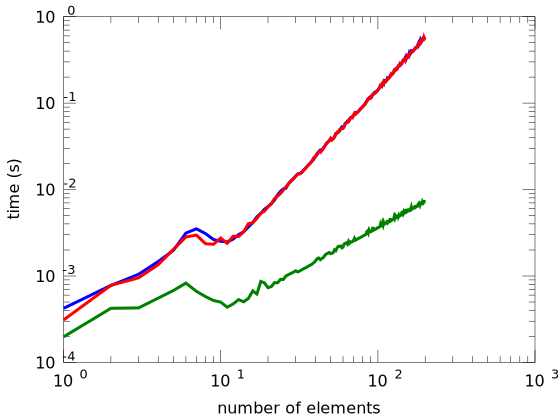

In [13]:
n=1:200;
loglog(n,t_GE,n,t_TD,n,t_GE_tridiag)
xlabel('number of elements')
ylabel('time (s)')